## ROC 曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [5]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

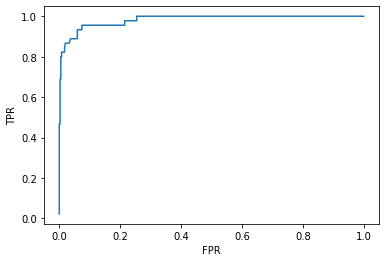

In [6]:
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### scikit-learn中的ROC

In [10]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

In [13]:
print(fprs)
print(tprs)
print(thresholds)
print(fprs.shape)
print(tprs.shape)
print(thresholds.shape)

[0.         0.         0.         0.00246914 0.00246914 0.00493827
 0.00493827 0.00740741 0.00740741 0.01728395 0.01728395 0.01975309
 0.01975309 0.03703704 0.03703704 0.05925926 0.05925926 0.07407407
 0.07407407 0.21481481 0.21481481 0.25432099 0.25432099 1.        ]
[0.         0.02222222 0.46666667 0.46666667 0.68888889 0.68888889
 0.8        0.8        0.82222222 0.82222222 0.84444444 0.84444444
 0.86666667 0.86666667 0.88888889 0.88888889 0.93333333 0.93333333
 0.95555556 0.95555556 0.97777778 0.97777778 1.         1.        ]
[ 20.97514257  19.97514257   6.3459115    6.22096769   3.55513266
   2.77443423   0.9932652   -0.82911845  -0.89614577  -2.10091732
  -2.45074492  -2.83181403  -2.84895765  -4.63766499  -4.66508991
  -6.16117272  -6.63889956  -7.65927585  -7.67802146 -15.74971561
 -15.88388534 -16.74188106 -16.9108351  -85.76642439]
(24,)
(24,)
(24,)


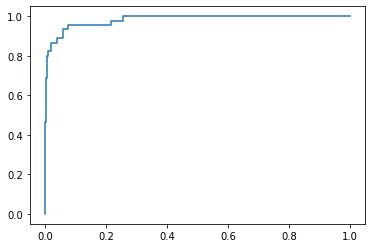

In [14]:
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
# 一般关注的是该曲线下方的面积数
# 如果面积越大，分类算法越好
# 因为如果在FPR小的时候TPR就很大的话，那么该曲线就会向左上偏

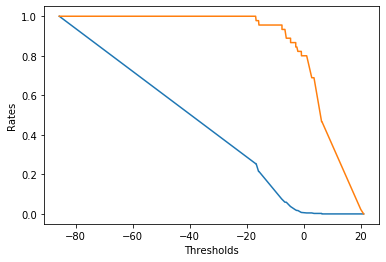

In [16]:
plt.plot(thresholds, fprs, label='FPR')
plt.plot(thresholds, tprs, label='FPR')
plt.xlabel('Thresholds')
plt.ylabel('Rates')
plt.show()

### ROC AUC
Area under curve

In [9]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)
# 最大的面积也就是1，所以值域是(0,1)

0.9823868312757201